In [13]:
import pandas as pd
import os
import cv2
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Reading file

In [2]:
csv_path = r"D:\Xray\Brain Tumor.csv"
df = pd.read_csv(csv_path)

In [ ]:
#Defining array for merged the files

In [3]:
merged_data = []


In [ ]:
#Merging the data based on Image Coloumn

In [4]:
image_folder = r"D:\Xray\Brain Tumor\Brain Tumor"

for index, row in df.iterrows():
    image_name = row['Image']
    class_value = row['Class']
    image_path = os.path.join(image_folder, image_name)
    merged_data.append((image_path, class_value))

In [5]:
merged_df = pd.DataFrame(merged_data, columns=['Image Path', 'Class'])


In [6]:
merged_df.head()

,Image Path,Class
0,D:\Xray\Brain Tumor\Brain Tumor\Image1,0
1,D:\Xray\Brain Tumor\Brain Tumor\Image2,0
2,D:\Xray\Brain Tumor\Brain Tumor\Image3,1
3,D:\Xray\Brain Tumor\Brain Tumor\Image4,1
4,D:\Xray\Brain Tumor\Brain Tumor\Image5,0


In [ ]:
#Saving the merged Data

In [7]:
output_path = r"D:\Xray\Brain Tumor\merged_data.csv"
merged_df.to_csv(output_path, index=False)

In [8]:
merged_data = pd.read_csv(r"D:\Xray\Brain Tumor\merged_data.csv")

In [11]:
img = cv2.imread(r"D:\Xray\Brain Tumor\Brain Tumor\Image1.jpg" )


In [ ]:
#Reading Image dimension

In [31]:
img.shape

(240, 240, 3)

In [ ]:
#Reading Sample Image

(240, 240, 3)

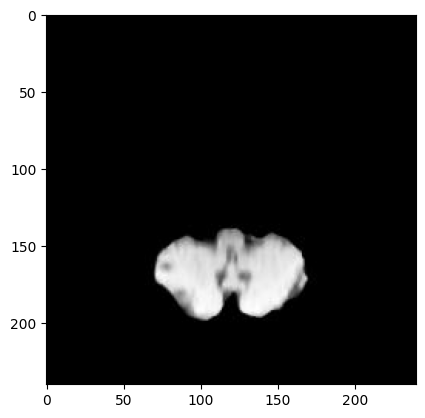

In [14]:
plt.imshow(img)
img.shape

In [ ]:
#Merged_data files Image coloumn value was not included .jpg adding .jpg to coloumn value

In [19]:

merged_data = pd.read_csv(r"D:\Xray\Brain Tumor\merged_data.csv")


merged_data["Image Path"] = merged_data["Image Path"].apply(lambda x: x + ".jpg")


merged_data.to_csv(r"D:\Xray\Brain Tumor\merged_data.csv", index=False)

In [ ]:
#Setting my training img dimension based on files Image dimension

In [20]:
input_shape = (240, 240, 3)  


In [21]:
image_paths = merged_data['Image Path'].values
labels = merged_data['Class'].values

In [ ]:
#Processing the images by normalizing it

In [22]:
def preprocess_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, input_shape[:2])
    image = image / 255.0  
    return image


In [ ]:
#X is image and y contains 0 or 1

In [23]:
processed_images = [preprocess_image(image_path) for image_path in image_paths]
X = tf.stack(processed_images)
y = tf.convert_to_tensor(labels)

In [ ]:
#Getting value for training

In [26]:
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [ ]:
#Creating model "CNN"

In [27]:
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
#Start training

In [28]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
94/94 [==============================] - 165s 2s/step - loss: 0.4997 - accuracy: 0.7786 - val_loss: 0.4778 - val_accuracy: 0.8021
Epoch 2/10
94/94 [==============================] - 281s 3s/step - loss: 0.3327 - accuracy: 0.8677 - val_loss: 0.8296 - val_accuracy: 0.6786
Epoch 3/10
94/94 [==============================] - 267s 3s/step - loss: 0.2579 - accuracy: 0.9003 - val_loss: 0.3265 - val_accuracy: 0.8526
Epoch 4/10
94/94 [==============================] - 264s 3s/step - loss: 0.1869 - accuracy: 0.9295 - val_loss: 0.3381 - val_accuracy: 0.8831
Epoch 5/10
94/94 [==============================] - 271s 3s/step - loss: 0.1517 - accuracy: 0.9418 - val_loss: 0.3677 - val_accuracy: 0.8792
Epoch 6/10
94/94 [==============================] - 267s 3s/step - loss: 0.1182 - accuracy: 0.9531 - val_loss: 0.5663 - val_accuracy: 0.8234
Epoch 7/10
94/94 [==============================] - 280s 3s/step - loss: 0.0791 - accuracy: 0.9727 - val_loss: 0.2881 - val_accuracy: 0.9163
Epoch 8/10
94

In [32]:
model.save("model.h5")


In [ ]:
#Analyzing graph for 

24/24 [==============================] - 6s 231ms/step


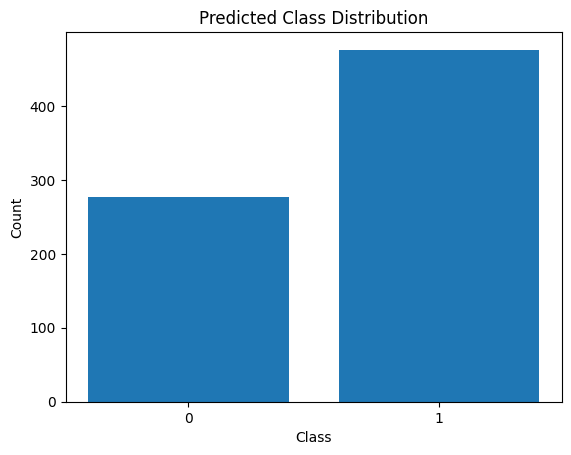

In [43]:
y_pred_prob = model.predict(X_test)

y_pred = [1 if prob >= 0.5 else 0 for prob in y_pred_prob]

class_counts = {0: y_pred.count(0), 1: y_pred.count(1)}

plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(list(class_counts.keys()))
plt.title('Predicted Class Distribution')
plt.show()

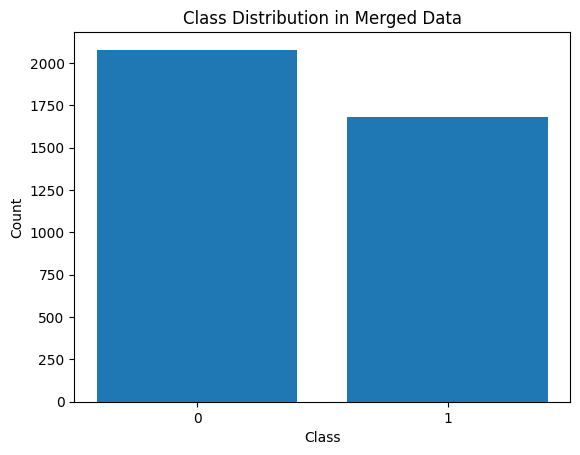

In [44]:
class_counts = merged_data['Class'].value_counts()

plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(class_counts.index)
plt.title('Class Distribution in Merged Data')
plt.show()

In [46]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

training_accuracy = history.history['accuracy']

print("Training Accuracy:", training_accuracy)

Epoch 1/10
94/94 [==============================] - 164s 2s/step - loss: 0.0344 - accuracy: 0.9890 - val_loss: 0.2356 - val_accuracy: 0.9402
Epoch 2/10
94/94 [==============================] - 317s 3s/step - loss: 0.0206 - accuracy: 0.9950 - val_loss: 0.2891 - val_accuracy: 0.9336
Epoch 3/10
94/94 [==============================] - 303s 3s/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.3448 - val_accuracy: 0.9323
Epoch 4/10
94/94 [==============================] - 328s 3s/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.3568 - val_accuracy: 0.9376
Epoch 5/10
94/94 [==============================] - 284s 3s/step - loss: 7.4226e-04 - accuracy: 1.0000 - val_loss: 0.3899 - val_accuracy: 0.9336
Epoch 6/10
94/94 [==============================] - 270s 3s/step - loss: 6.7375e-04 - accuracy: 1.0000 - val_loss: 0.3710 - val_accuracy: 0.9389
Epoch 7/10
94/94 [==============================] - 269s 3s/step - loss: 4.5111e-04 - accuracy: 1.0000 - val_loss: 0.4038 - val_accuracy: 0.9402
E

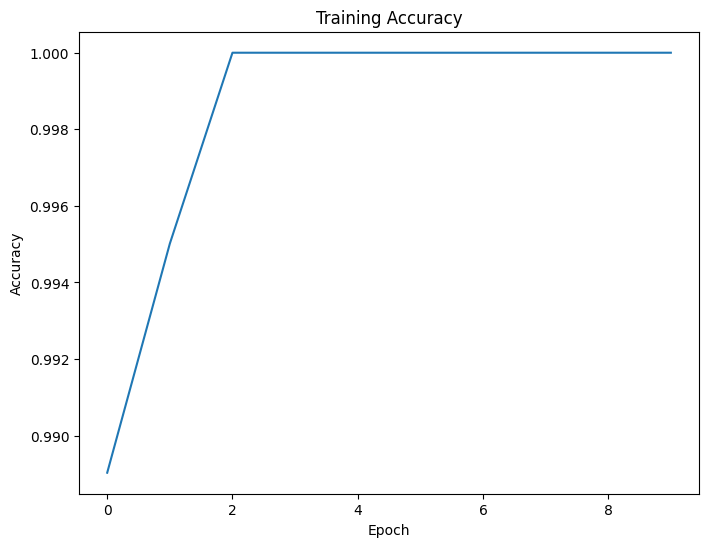

In [48]:
plt.figure(figsize=(8, 6))
plt.plot(training_accuracy)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.show()